# CHAPTER-4  (INTRODUCING SPECTRAL ANALYSIS)

In [ ]:
pip install numpy


In [2]:
import numpy as np

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

In [5]:
pip install Scipy

Note: you may need to restart the kernel to use updated packages.


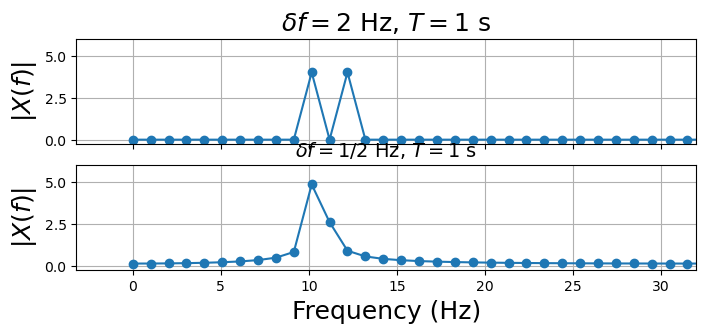

In [8]:
#4.1
import matplotlib.pyplot as plt
from numpy import fft
Nf = 64 # N- DFT size
fs = 64 # sampling frequency
f = 10 # one signal
t =np.arange(0,1,1/fs) # time-domain samples
deltaf = 1/2. # second nearby frequency

# keep x and y-axes on same respective scale
fig,ax =plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,3))

x=np.cos(2*np.pi*f*t) + np.cos(2*np.pi*(f+2)*t) # 2 Hz frequency difference
X = fft.fft(x,Nf)/np.sqrt(Nf)
ax[0].plot(np.linspace(0,fs,Nf),abs(X),'-o')
ax[0].set_title(r'$\delta f = 2$ Hz, $T=1$ s',fontsize=18)
ax[0].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[0].grid()
x=np.cos(2*np.pi*f*t) + np.cos(2*np.pi*(f+deltaf)*t) # delta_f frequency difference
X = fft.fft(x,Nf)/np.sqrt(Nf)
ax[1].plot(np.linspace(0,fs,Nf),abs(X),'-o')
ax[1].set_title(r'$\delta f = 1/2$ Hz, $T=1$ s',fontsize=14)
ax[1].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].set_ylim(ymax=6)
ax[1].grid()

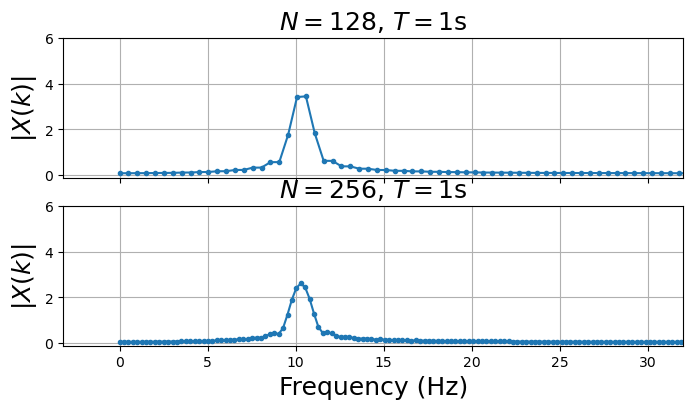

In [10]:
#4.2
Nf = 64*2 # FFT size
fig,ax =plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,4))

X = fft.fft(x,Nf)/np.sqrt(Nf)
ax[0].plot(np.linspace(0,fs,len(X)),abs(X),'-o',ms=3.) # marker size=3
ax[0].set_title(r'$N=%d$, $T=1$s'%Nf,fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[0].grid()

Nf = 64*4 # FFT size
X = fft.fft(x,Nf)/np.sqrt(Nf)
ax[1].plot(np.linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[1].set_title(r'$N=%d$, $T=1$s'%Nf,fontsize=18)
ax[1].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(xmax=fs/2)
ax[1].set_ylim(ymax=6)
ax[1].grid()

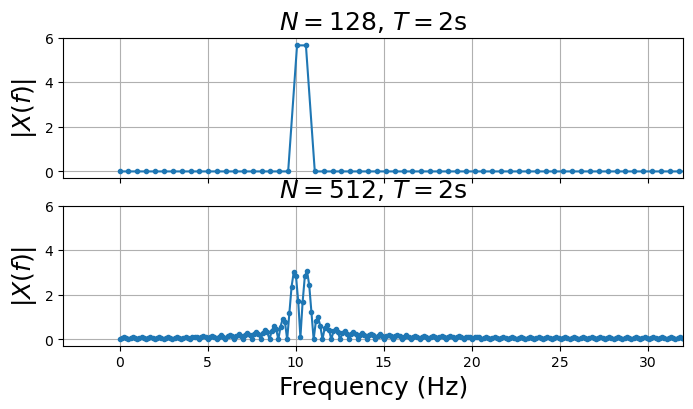

In [12]:
#4.3
t =np.arange(0,2,1/fs)
x=np.cos(2*np.pi*f*t) +np.cos(2*np.pi*(f+deltaf)*t)

Nf = 64*2 # FFT size
fig,ax =plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,4))

X = fft.fft(x,Nf)/np.sqrt(Nf)
ax[0].plot(np.linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[0].set_title(r'$N=%d$, $T=2$s'%Nf,fontsize=18)
ax[0].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[0].grid()

Nf = 64*8 # FFT size
X = fft.fft(x,Nf)/np.sqrt(Nf)
ax[1].plot(np.linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[1].set_title(r'$N=%d$, $T=2$s'%Nf,fontsize=18)
ax[1].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].set_ylim(ymax=6)
ax[1].grid()

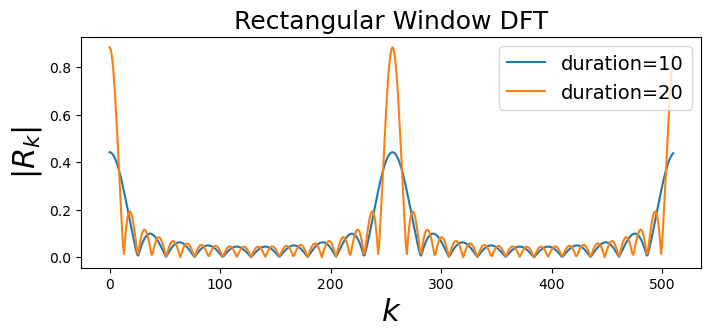

In [14]:
#4.4
def abs_sinc(k=None,N=64,Ns=32):
    'absolute value of sinc'
    if k is None: k =np.arange(0,N-1)
    y=np.where(k == 0, 1.0e-20, k)
    return abs(np.sin(Ns*2*np.pi/N*y)/np.sin(2*np.pi*y/N))/np.sqrt(N)

fig,ax=plt.subplots()
fig.set_size_inches((8,3))

ax.plot(abs_sinc(N=512,Ns=10),label='duration=10')
ax.plot(abs_sinc(N=512,Ns=20),label='duration=20')
ax.set_xlabel('$k$',fontsize=22)
ax.set_ylabel(r'$|R_k|$',fontsize=22)
ax.set_title('Rectangular Window DFT',fontsize=18)
ax.legend(loc=0,fontsize=14);

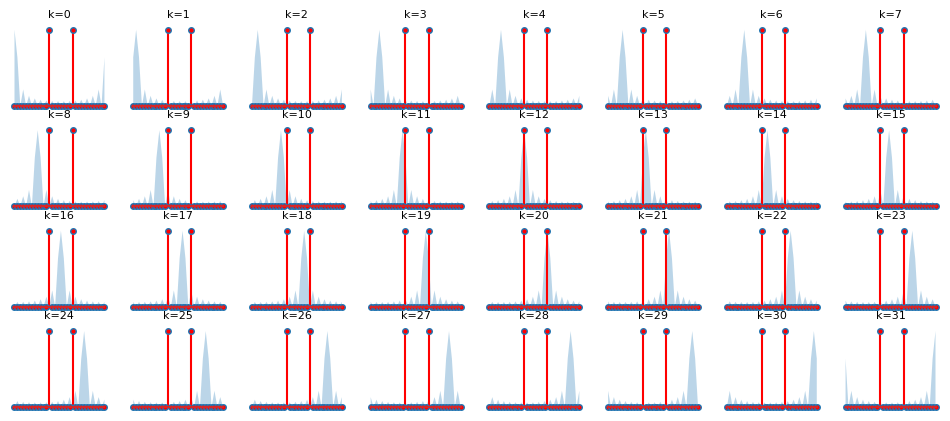

In [16]:
#4.5
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n =np.arange(N)
# use numpy broadcasting to create matrix
    U =np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)

Nf = 32 # DFT size
U = dftmatrix(Nf,Nf)
x = U[:,12].real # input signal
X = U.H*x # DFT of input
rect =np.ones((int(Nf/2),1)) # short rectangular window
z = x[:int(Nf/2)] # product of rectangular window and x (i.e. chopped version of x)
R = dftmatrix(Nf,int(Nf/2)).H*rect # DFT of rectangular window
Z = dftmatrix(Nf,int(Nf/2)).H*z # DFT of product of x_n and r_n

# use numpy broadcasting to setup summand’s indices
idx=np.arange(Nf)-np.arange(Nf)[:,None]
idx[idx<0]+=Nf # add periodic Nf to negative indices for wraparound
a =np.arange(Nf) # k^th frequency index

fig,ax =plt.subplots(4,8,sharex=True,sharey=True)
fig.set_size_inches((12,5))
for i,j in enumerate(ax.flat):
    j.fill_between(np.arange(Nf),1/np.sqrt(Nf)*abs(R[idx[:,i],0]).flat,0,alpha=0.3)
    # separate stem parts
    markerline, stemlines, baseline =j.stem(np.arange(Nf),abs(X))
    plt.setp(markerline, 'markersize', 4.)
    plt.setp(markerline,'markerfacecolor','r')
    plt.setp(stemlines,'color','r')
    j.axis('off')
    j.set_title('k=%d'%i,fontsize=8)

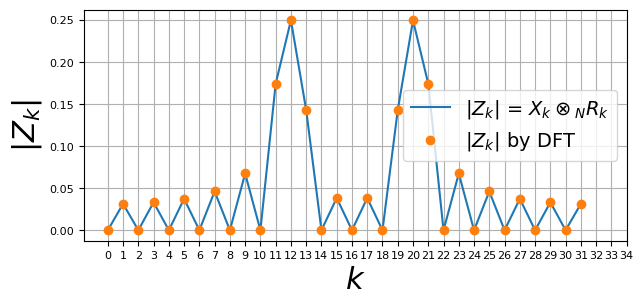

In [17]:
#4.6
fig,ax=plt.subplots()
fig.set_size_inches((7,3))
ax.plot(a,abs(R[idx,0]*X)/np.sqrt(Nf),label=r'$|Z_k|$ = $X_k\otimes_N R_k$')
ax.plot(a,abs(Z),'o',label=r'$|Z_k|$ by DFT')
ax.set_xlabel('$k$',fontsize=22)
ax.set_ylabel(r'$|Z_k|$',fontsize=22)
ax.set_xticks(np.arange(ax.get_xticks().max()))
ax.tick_params(labelsize=8)
ax.legend(loc=0,fontsize=14)
ax.grid()

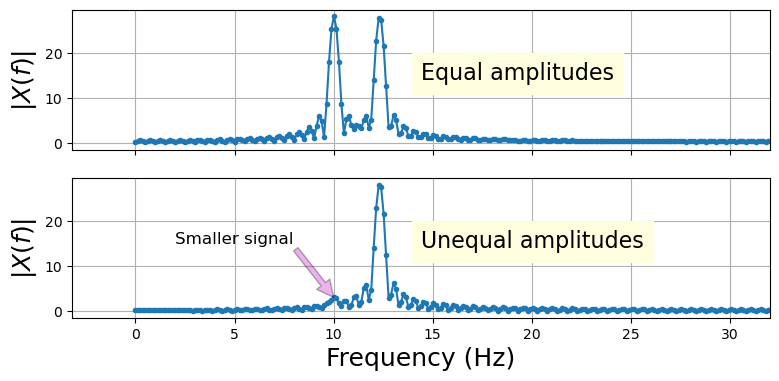

In [18]:
#4.7
from scipy import signal
import math
from numpy import fft

 # some useful functions
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n =np.arange(N)
    U =np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcastingto create matrix 
    return U/np.sqrt(Nfft)

def db20(W,Nfft=None):
    'Given DFT, return power level in dB'
    if Nfft is None: # assume W is DFT
        return 20*np.log10(abs(W))
    else: # assume time-domain passed, so need DFT
        return 20*np.log10(abs( fft.fft(W,Nfft)/np.sqrt(Nfft) ) )

fs = 64 # sampling frequency
t =np.arange(0,2,1/fs)
f = 10 # one signal
deltaf = 2.3 # second nearby frequency
Nf = 512
fig,ax =plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((9,4))
x=10*np.cos(2*np.pi*f*t) + 10*np.cos(2*np.pi*(f+deltaf)*t) # equal amplitudes
X = fft.fft(x,Nf)/np.sqrt(Nf)
ax[0].plot(np.linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[0].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[0].set_xlim(xmax = fs/2)
ax[0].grid()
ax[0].text(0.5,0.5,'Equal amplitudes',
            transform=ax[0].transAxes,
            backgroundcolor='Lightyellow',
            fontsize=16)
x=np.cos(2*np.pi*f*t) + 10*np.cos(2*np.pi*(f+deltaf)*t) # one has 10x the amplitude
X = fft.fft(x,Nf)/np.sqrt(Nf)
ax[1].plot(np.linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[1].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].grid()


ax[1].text(0.5,0.5,'Unequal amplitudes',
            transform=ax[1].transAxes,
            backgroundcolor='lightyellow',
            fontsize=16)
ax[1].annotate('Smaller signal',fontsize=12,xy=(f,abs(X)[int(f/fs*Nf)]),
               xytext=(2,15),
               arrowprops={'facecolor':'m','alpha':.3});

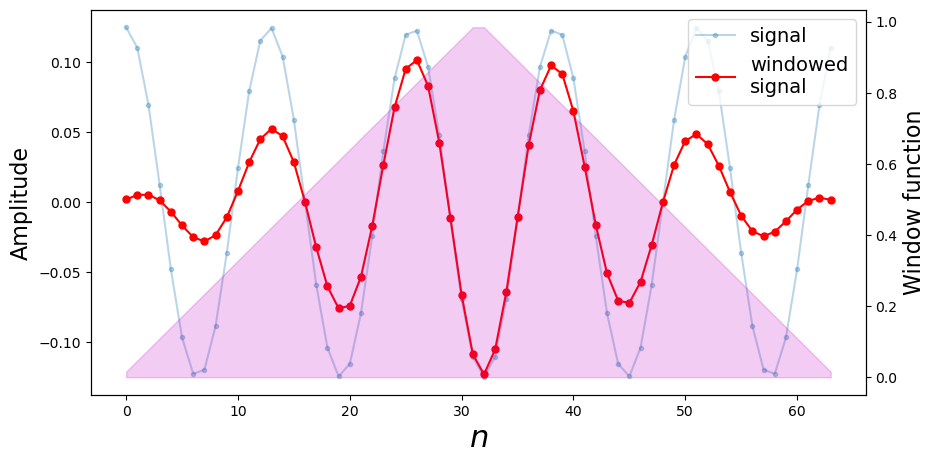

In [19]:
#4.8
fig,ax =plt.subplots()
fig.set_size_inches((10,5))

Nf = 128
nsamp = 64
window = signal.triang(nsamp)
rectwin =np.ones(nsamp)

x=np.array(dftmatrix(64,64)[:,5].real).flatten() # convert to numpy array
n =np.arange(len(x))
window = signal.triang(len(x))

ax.plot(n,x,'-o',label='signal',ms=3.,alpha=0.3)
ax.plot(n,window*x,'-or',label='windowed\nsignal',ms=5.)
ax.set_ylabel('Amplitude',fontsize=16)
ax.set_xlabel('$n$',fontsize=22)
ax.legend(loc=0,fontsize=14)
ax2 = ax.twinx()
ax2.fill_between(n,window,alpha=0.2,color='m')
ax2.set_ylabel('Window function',fontsize=16);

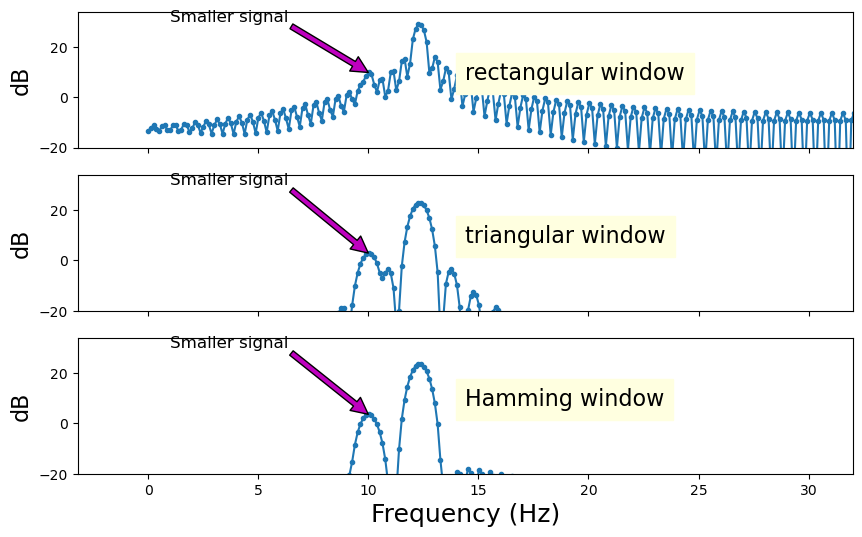

In [22]:
#4.9
Nf = 512
fig,ax =plt.subplots(3,1,sharex=True,sharey=True)
fig.set_size_inches((10,6))

x=np.cos(2*np.pi*f*t) + 10*np.cos(2*np.pi*(f+deltaf)*t)
X = fft.fft(x,Nf)/np.sqrt(Nf)
ax[0].plot(np.linspace(0,fs,len(X)),db20(X),'-o',ms=3.)
ax[0].set_xlim(xmax = fs/2)
ax[0].set_ylabel('dB',fontsize=16)
ax[0].text(0.5,0.5,'rectangular window',
                  transform=ax[0].transAxes,
                  backgroundcolor='lightyellow',
                  fontsize=16)
ax[0].annotate('Smaller signal',
               fontsize=12,xy=(f,db20(X)[int(f/fs*Nf)]),
               xytext=(1,30),
               arrowprops={'facecolor':'m'})
w = signal.triang(len(x))
X = fft.fft(x*w,Nf)/np.sqrt(Nf)
ax[1].plot(np.linspace(0,fs,len(X)),db20(X),'-o',ms=3.)
ax[1].set_xlim(xmax = fs/2)
ax[1].set_ylabel('dB',fontsize=16)
ax[1].text(0.5,0.5,'triangular window',
                transform=ax[1].transAxes,
                backgroundcolor='lightyellow',
                fontsize=16)
ax[1].annotate('Smaller signal',
fontsize=12,xy=(f,db20(X)[int(f/fs*Nf)]),
               xytext=(1,30),
               arrowprops={'facecolor':'m'})
w = signal.hamming(len(x))
X = fft.fft(x*w,Nf)/np.sqrt(Nf)
ax[2].plot(np.linspace(0,fs,len(X)),db20(X),'-o',ms=3.)
ax[2].set_xlabel('Frequency (Hz)',fontsize=18)
ax[2].set_xlim(xmax = fs/2)
ax[2].set_ylabel('dB',fontsize=16)
ax[2].set_ylim(ymin=-20)
ax[2].text(0.5,0.5,'Hamming window',
            transform=ax[2].transAxes,
            backgroundcolor='lightyellow',
            fontsize=16)
ax[2].annotate('Smaller signal',
fontsize=12,xy=(f,db20(X)[int(f/fs*Nf)]),
xytext=(1,30),
arrowprops={'facecolor':'m'});

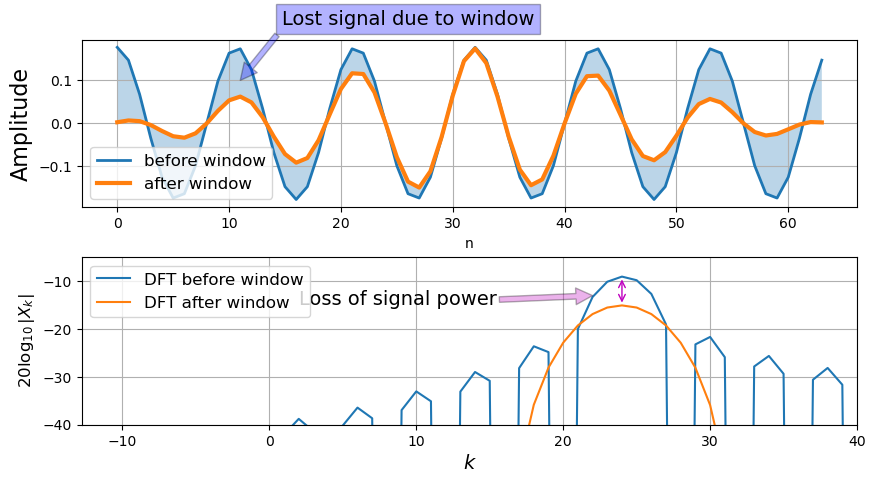

In [39]:
#4.10
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy import fft
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/np.sqrt(Nfft)

def db20(W,Nfft=None):
    'Given DFT, return power level in dB'
    if Nfft is None: # assume W is DFT
        return 20*np.log10(abs(W))
    else: # assume time-domain passed, so need DFT
        DFT= fft.fft(np.array(W).flatten(),Nfft)/np.sqrt(Nfft)
        return 20*np.log10(abs(DFT.flatten()))

U=dftmatrix(64)
u=U[:,6].real*np.sqrt(2) # create test sinusoid

fo = 2*np.pi/64*6 # in radians/sec
nz=np.random.randn(64,1) # noise samples
w=signal.triang(64) # window function

fig,ax= plt.subplots(2,1)
fig.set_size_inches((10,5))
plt.subplots_adjust(hspace=.3)
n = np.arange(len(u))
ax[0].plot(n,u.real,label='before window',lw=2)
ax[0].set_ylabel('Amplitude',fontsize=16)
ax[0].plot(n,np.diag(w)*u.real,label='after window',lw=3.)
ax[0].fill_between(n,np.array(u).flat, np.array(np.diag(w)*u).flat,alpha=0.3)
ax[0].legend(loc=0,fontsize=12)
ax[0].set_xlabel('n')
ax[0].grid()
ax[0].annotate('Lost signal due to window',fontsize=14, bbox={'fc':'b','alpha':.3},
      xy=(11,0.1),
      xytext=(30,40), textcoords='offset points',
      arrowprops={'facecolor':'b','alpha':.3})

N=256 # DFT size for plot
idx = int(fo/(2*np.pi/N))
ax[1].plot(db20(u,N),label='DFT before window')
ax[1].plot(db20(np.diag(w)*u,N),label='DFT after window')
ax[1].set_ylim(ymin=-40,ymax=-5)
ax[1].set_xlim(xmax=40)
ax[1].set_ylabel(r'$20\log_{10}|X_k|$',fontsize=12)
ax[1].set_xlabel(r'$k$',fontsize=14)
ax[1].annotate('Loss of signal power',fontsize=14,xy=(22,-13),
            xytext=(2,-15),
            arrowprops={'facecolor':'m','alpha':.3})
pkU = db20(u,N)[idx]
pkW = db20(np.diag(w)*u,N)[idx]
ax[1].annotate('',xy=(idx,pkW),xytext=(idx,pkU),fontsize=12,
               arrowprops={'arrowstyle':'<->','color':'m'})
ax[1].legend(loc=0,fontsize=12)
ax[1].grid()


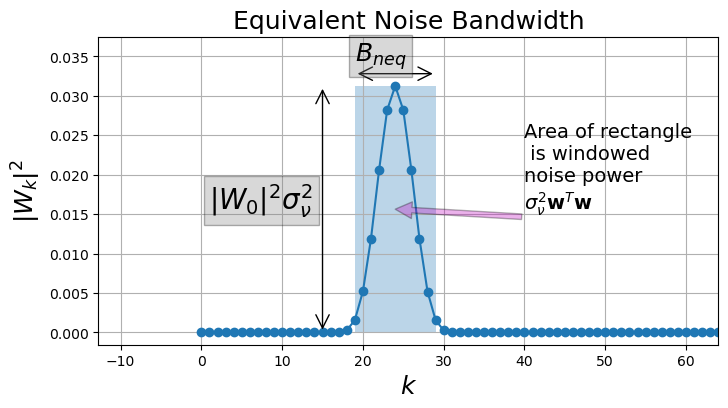

In [40]:
#4.11
from matplotlib.patches import Rectangle

fig,ax = plt.subplots()
fig.set_size_inches((8,4))

N = 256 # DFT size
idx = int(fo/(2*np.pi/N))
Xm = abs(fft.fft(np.array(np.diag(w)*u).flatten(),N)/np.sqrt(N))**2
ax.plot(Xm,'-o')
ax.add_patch(Rectangle((idx-10/2,0),width=10,height=Xm[idx],alpha=0.3))
ax.set_xlim(xmax = N/4)
ax.set_ylabel(r'$|W_k|^2$',fontsize=18)
ax.set_xlabel(r'$k$',fontsize=18)
ax.set_title('Equivalent Noise Bandwidth',fontsize=18)
ax.annotate('Area of rectangle\n is windowed\nnoise power\n'              +r'$\sigma_\nu^2 \mathbf{w}^T \mathbf{w}$',
            fontsize=14,
            xy=(idx,Xm.max()/2.),
            xytext=(40,Xm.max()/2.),
            arrowprops={'facecolor':'m','alpha':.3});
ax.annotate('',ha='center',fontsize=24,
             xy=(idx+10/2,Xm.max()*1.05),
             xytext=(idx-10/2,Xm.max()*1.05),
             arrowprops=dict(arrowstyle='<->'))
ax.annotate('',ha='center',fontsize=24,
             xy=(15,0),
             xytext=(15,Xm.max()),
             arrowprops=dict(arrowstyle='<->'))
ax.text( 1, Xm.max()/2,r'$ |W_0|^2\sigma_\nu^2 $',fontsize=20,bbox={'fc':'gray','alpha':.3})
ax.text( idx-5, Xm.max()*1.1,r'$B_{neq}$',fontsize=18,bbox={'fc':'gray','alpha':.3})
ax.set_ylim(ymax = Xm.max()*1.2)
ax.grid()


(-1.0, 16.8)

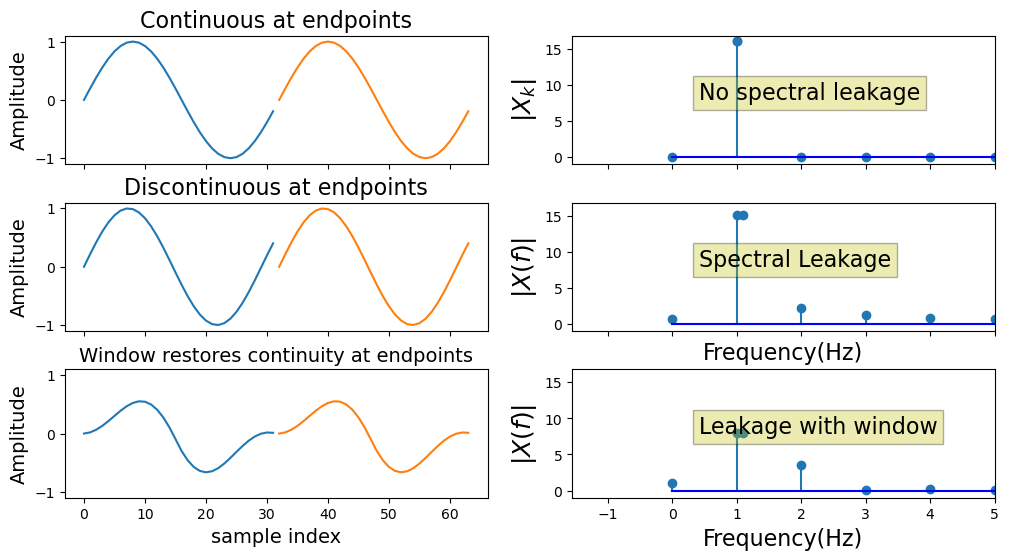

In [28]:
#4.12
from scipy import signal
fo = 1 # signal frequency
fs = 32 # sample frequency
Ns = 32 # number of samples
x =np.sin(2*np.pi*fo/fs*np.arange(Ns)) # sampled signal
fig,axs=plt.subplots(3,2,sharex='col',sharey='col')
fig.set_size_inches((12,6))
plt.subplots_adjust(hspace=.3)

ax=axs[0,0]
ax.plot(np.arange(Ns),x,label='signal')
ax.plot(np.arange(Ns)+Ns,x,label='extension')
ax.set_ylabel('Amplitude',fontsize=14)
ax.set_title('Continuous at endpoints',fontsize=16)

ax=axs[0,1]
N=Ns #chosen so DFT bin is exactly on fo
Xm = abs(fft.fft(x,N))
idx = int(fo/(fs/N))
ax.stem(np.arange(N)/N*fs,Xm,basefmt='b-')
ax.plot(fo, Xm[idx],'o')
ax.set_ylabel(r'$|X_k|$',fontsize=18)
ax.set_xlim(xmax=5)
ax.set_ylim(ymin=-1)
ax.text(0.3,0.5,'No spectral leakage',fontsize=16,
transform=ax.transAxes,
bbox={'fc':'y','alpha':.3})

fo = 1.1 # signal frequency
x =np.sin(2*np.pi*fo/fs*np.arange(Ns)) # sampled signal

ax=axs[1,0]
ax.plot(np.arange(Ns),x,label='signal')
ax.plot(np.arange(Ns)+Ns,x,label='extension')
ax.set_ylabel('Amplitude',fontsize=14)
ax.set_title('Discontinuous at endpoints',fontsize=16)
ax=axs[1,1]
Xm = abs(fft.fft(x,N))
idx = int(fo/(fs/N))
ax.stem(np.arange(N)/N*fs,Xm,basefmt='b-')
ax.plot(fo, Xm[idx],'o')

ax.set_xlabel('Frequency(Hz)',fontsize=16)
ax.set_ylabel(r'$|X(f)|$',fontsize=18)
ax.text(0.3,0.5,'Spectral Leakage',fontsize=16,
transform=ax.transAxes,
bbox={'fc':'y','alpha':.3})
ax.set_xlim(xmax=5)
ax.set_ylim(ymin=-1)


x = x*signal.triang(Ns,2)
ax=axs[2,0]
ax.plot(np.arange(Ns),x,label='signal')
ax.plot(np.arange(Ns)+Ns,x,label='extension')
ax.set_xlabel('sample index',fontsize=14)
ax.set_ylabel('Amplitude',fontsize=14)
ax.set_title('Window restores continuity at endpoints',fontsize=14)

ax=axs[2,1]
Xm = abs(fft.fft(x,N))
idx = int(fo/(fs/N))
ax.stem(np.arange(N)/N*fs,Xm,basefmt='b-')
ax.plot(fo, Xm[idx],'o')
ax.set_xlabel('Frequency(Hz)',fontsize=16)
ax.set_ylabel(r'$|X(f)|$',fontsize=18)
ax.text(0.3,0.5,'Leakage with window',fontsize=16,
transform=ax.transAxes,
bbox={'fc':'y','alpha':.3})
ax.set_xlim(xmax=5)
ax.set_ylim(ymin=-1)

C:\Users\HP\AppData\Local\Temp\ipykernel_22140\2952035554.py:20: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(abs(DFT.flatten()))


Text(0.4, 0.5, 'Peak sidelobe level')

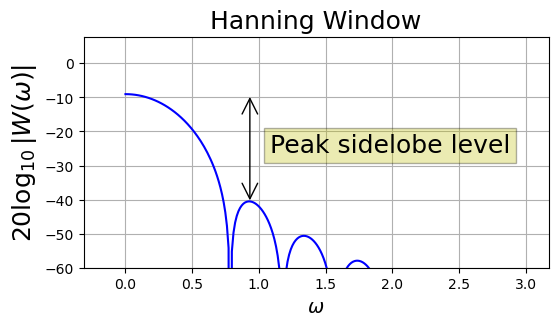

In [29]:
#4.13
fig, ax =plt.subplots()
fig.set_size_inches((6,3))

Ns= 16
Nf = 256*2
freqs =np.arange(Nf)*2*np.pi/Nf
w =signal.hann(Ns,False)
W = db20(w,Nf)

ax.plot(freqs,W,'-b',ms=4.)
ax.set_ylim(ymin = -60)
ax.set_xlim(xmax =np.pi*1.01)
ax.set_xlabel(r'$\omega$',fontsize=14)
ax.set_ylabel(r'$20\log_{10}|W(\omega)|$',fontsize=18)
ax.grid()
ax.set_title('Hanning Window',fontsize=18)
ax.annotate('',fontsize=28,
xy=(76/Nf*2*np.pi,W[0]),
xytext=(76/Nf*2*np.pi,W[0]-32),
arrowprops={'facecolor':'b','arrowstyle':'<->'},)
ax.text(0.4,0.5,'Peak sidelobe level',
fontsize=18,
transform=ax.transAxes,
bbox={'fc':'y','alpha':.3})

In [34]:
#4.14
def peak_sidelobe(w,N=256,return_index=False, return_all=False):
    '''Given window function, return peak sidelobe level and bin index of
    all (return_all=True) or some sidelobe peaks if desired
    (return_index=True). Note that this method fails when the window
    function has no roots on the unit circle (e.g. exponential window).
    The return index is in units of DFT-bin (k/N).
    '''

    assert (len(w)<=N) # need longer DFT otherwise
    r=np.roots(w) # find complex roots of window function
    r = r[np.where(np.round(abs(r),3)==1)] # keep only those on unit circle(approx)
    y=np.log(r).imag/2./np.pi*N # get k^th bin index
    y=y[y>0].astype(np.int32) # keep positive half only as integer roundoff
    y=np.unique(y) # dump repeated
    y.sort() # sort in-place
    W = 20*np.log10(abs(fft.fft(w,N))) #compute DFT
    # loop through slices and pick out max() as peak for that slice’s sidelobe
    sidelobe_levels = []
    sidelobe_idx =[]
    for s in [slice(i,j) for i,j in zip(y[:-1],y[1:])]:
        imx= s.start+W[s].argmax() # bin index of max
        peak= W[imx]-W[0] # relative to global peak
        sidelobe_levels.append( peak ) # store sidelobe level for later

        sidelobe_idx.append(imx/N) # ... with corresponding bin
    if return_all:
        return zip(sidelobe_levels, sidelobe_idx)
    if return_index:
        return (sidelobe_levels[0], sidelobe_idx[0])
    return sidelobe_levels[0]
def dftmatrix(N=32,Ns=None):
    'construct DFT matrix of size N give Ns time-samples'
    k= np.arange(N)
    if Ns is None: Ns = N
    n = np.arange(Ns)
    U = np.matrix(np.exp(1j* 2*np.pi/N *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/np.sqrt(N)

C:\Users\HP\AppData\Local\Temp\ipykernel_22140\1951773528.py:17: RuntimeWarning: divide by zero encountered in log10
  W = 20*np.log10(abs(fft.fft(w,N))) #compute DFT


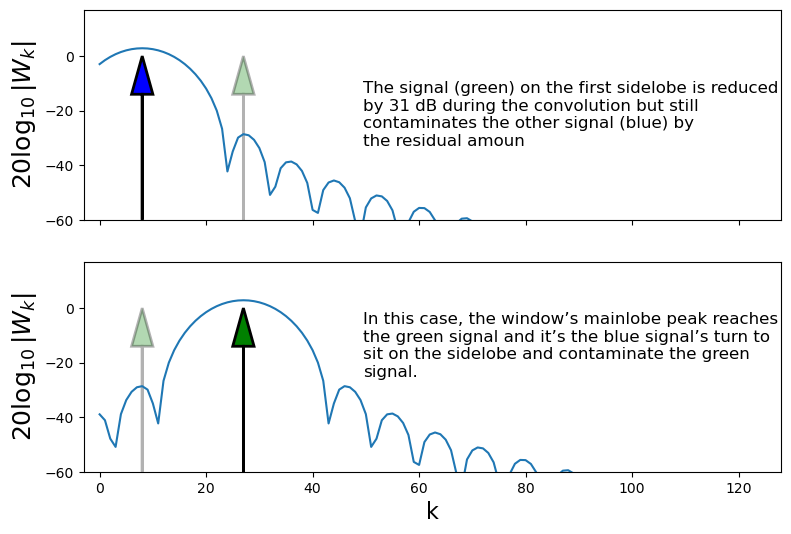

In [36]:
#4.15
Ns = 64
N= 512
U=dftmatrix(N=N,Ns=Ns)
offset=8 # place DFT near middle of plot for readability
u=np.array(U[:,offset]).flatten()*np.sqrt(N) # phase shifts
w = np.hanning(Ns)
level,idx = peak_sidelobe(w,N,return_index=True)
x0 = u*np.ones(Ns)
x1=u*np.exp(1j*2*np.pi*np.arange(Ns)*(idx)) # signal on peak of sidelobe
fig,axs = plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((9,6))
ax=axs[0]
ax.plot(db20(w*x0,N))
ax.arrow(offset+idx*N,-60,0,60,
         length_includes_head=True,lw=2.,
         head_length=14,head_width=4,fc='g',alpha=0.3)
#ax.arrow( idx*N,0,0,3,length_includes_head=True,lw=1.5,head_width=2,fc=’g’)
ax.arrow(offset,-60,0,60,
         length_includes_head=True,
         lw=2.,head_length=14,head_width=4,fc='b')
#ax.legend(loc=0)
ax.set_xlim(xmax=N/4.,xmin=-3)
ax.set_ylim(ymax = 17,ymin=-60)
ax.set_ylabel(r'$20\log_{10}|W_k|$',fontsize=18)
ax.text(0.4,.5,'''The signal (green) on the first sidelobe is reduced
by 31 dB during the convolution but still
contaminates the other signal (blue) by
the residual amoun''',va='center',fontsize=12,transform=ax.transAxes);
ax=axs[1]
ax.plot(db20(w*x1,N))
ax.arrow(offset+idx*N,-60,0,60,
         length_includes_head=True,lw=2.,
         head_length=14,head_width=4,fc='g')
ax.arrow(offset,-60,0,60,
         length_includes_head=True,lw=2.,
         head_length=14,head_width=4,fc='g',alpha=0.3)
#ax.legend(loc=0)
ax.set_xlim(xmax=N/4.,xmin=-3)
ax.set_ylim(ymax = 17,ymin=-60)
ax.set_ylabel(r'$20\log_{10}|W_k|$',fontsize=18)
ax.set_xlabel('k',fontsize=16)
ax.text(0.4,.6,'''In this case, the window’s mainlobe peak reaches
the green signal and it’s the blue signal’s turn to
sit on the sidelobe and contaminate the green
signal.''',va='center',fontsize=12,transform=ax.transAxes);

Text(1.3, -2, '-3 dB')

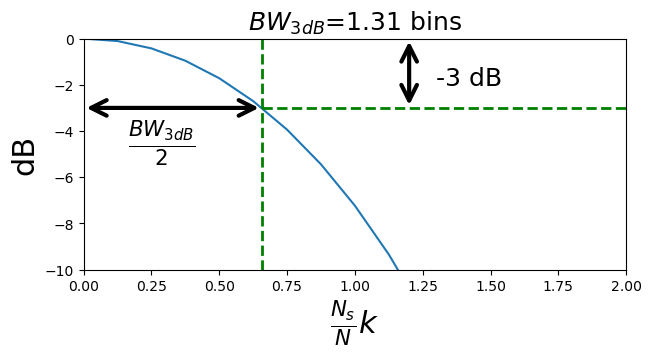

In [37]:
#4.16
fig,ax = plt.subplots()
fig.set_size_inches((7,3))
N=512
w=signal.windows.hamming(Ns)
W=db20(w,N)
m =10
p=np.polyfit(np.arange(m)/N*Ns,W[:m]-W[0]+3.01,2) # fit quadratic polynomial
width = np.roots(p)[0]*2 # 3-dB beamwidth
ax.plot(np.arange(N)/N*Ns,W-W[0]) # normalize to peak
ax.set_ylim(ymin=-10)
ax.set_ylim(ymax=0)
ax.set_xlim(xmax = 2)
ax.set_xlim(xmin = 0)
ax.vlines(width/2,0,-60,lw=2.,linestyle='--',color='g')
ax.set_ylabel('dB',fontsize=22)
ax.set_title(r'$ BW_{3dB}$=%3.2f bins'%width,fontsize=18)
ax.set_xlabel(r'$\frac{N_s}{N} k$',fontsize=22)
ax.annotate('',fontsize=28,xy=(0,-3),
            xytext=(width/2,-3),
            arrowprops=dict(arrowstyle="<->",lw=3))
ax.annotate('',fontsize=28,xy=(1.2,0),
            xytext=(1.2,-3),
            arrowprops=dict(arrowstyle="<->",lw=3))
ax.hlines(-3,width/2,2,linestyle='--',color='g',lw=2.)
ax.text( width/2/4,-5,r'$\frac{BW_{3dB}}{2}$',fontsize=22)
ax.text( 1.3,-2,'-3 dB',fontsize=18)

C:\Users\HP\AppData\Local\Temp\ipykernel_22140\2952035554.py:20: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(abs(DFT.flatten()))


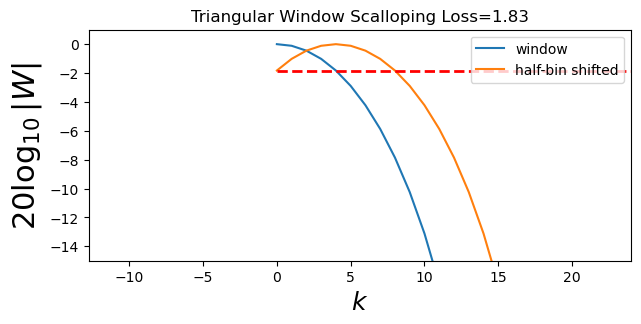

In [38]:
#4.17
fig,ax =plt.subplots()
fig.set_size_inches((7,3))

N=256
Ns = 32
w=signal.windows.triang(Ns)
W=db20(w,N)

W0 = db20(np.exp(1j*2*np.pi/Ns*np.arange(Ns)*1/2.)*w,N)-W[0]
W=W-W[0] # rescale for plot

ax.plot(W,label='window')
ax.plot(W0,label='half-bin shifted')
scalloping_loss = W[0]-W0[0]
ax.axis(ymin=-15,ymax=1,xmax=24)

ax.set_title('Triangular Window Scalloping Loss=%3.2f'%(scalloping_loss))
ax.set_xlabel('$k$',fontsize=18)
ax.set_ylabel(r'$20\log_{10}|W|$',fontsize=22)
ax.hlines(-scalloping_loss,0,24,color='red',linestyle='--',lw=2.)
ax.legend(loc=0)